<a href="https://colab.research.google.com/github/tccnchsu/PDE/blob/main/A_sine_function_can_be_approximated_by_a_series_of_Gaussian_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code defines the gaussian_1d function and a 1D convolution function convolve_1d. In the example, a square wave is generated as the input signal and convolved with the Gaussian kernel generated by the gaussian_1d function. Finally, it plots the original signal and the convolved signal.

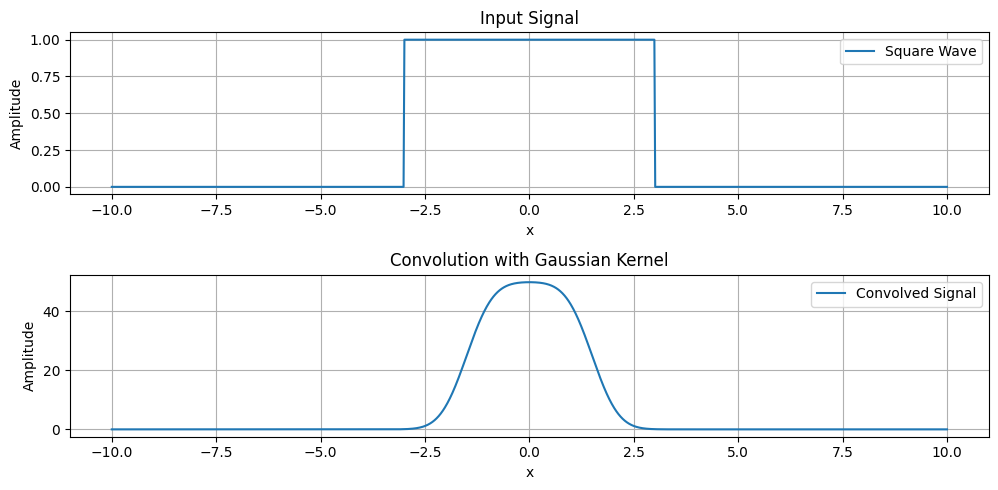

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define 1D convolution function
def convolve_1d(signal, kernel):
    # Get sizes
    signal_len = len(signal)
    kernel_len = len(kernel)

    # Compute convolution size
    conv_size = signal_len + kernel_len - 1

    # Initialize convolution result
    result = np.zeros(conv_size)

    # Flip the kernel
    kernel = np.flip(kernel)

    # Perform convolution
    for i in range(conv_size):
        for j in range(kernel_len):
            if (i - j) >= 0 and (i - j) < signal_len:
                result[i] += signal[i - j] * kernel[j]

    return result

# Example: Convolution of a square wave with Gaussian function
x_values = np.linspace(-10, 10, 1000)  # Generating x values from -10 to 10
square_wave = np.where(np.abs(x_values) <= 3, 1.0, 0.0)  # Generating a square wave
gaussian_kernel = gaussian_1d(x_values, 0, 1, 1)  # Gaussian kernel

# Convolve square wave with Gaussian kernel
convolved_signal = convolve_1d(square_wave, gaussian_kernel)

# Adjust x-values array
adjusted_x_values = np.linspace(-10, 10, len(convolved_signal))

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(x_values, square_wave, label='Square Wave')
plt.title('Input Signal')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(adjusted_x_values, convolved_signal, label='Convolved Signal')
plt.title('Convolution with Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Certainly! A sine function can be approximated by a series of Gaussian functions through a process known as the Fourier transform. The Fourier transform allows us to decompose a function into a series of sinusoidal components, each with its own frequency, phase, and amplitude.

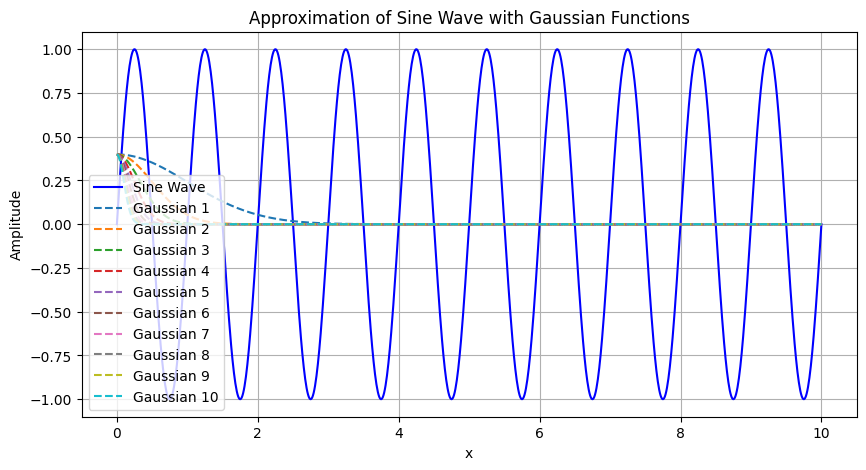

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function with amplitude parameter
def gaussian_1d(x, x0, sigma, amplitude):
    exponent = -((x - x0) ** 2) / (2 * sigma ** 2)
    return amplitude * np.exp(exponent) / (np.sqrt(2 * np.pi) * sigma)

# Define the sine function
def sine_function(x, frequency, phase, amplitude):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

# Generate x values
x_values = np.linspace(0, 10, 1000)

# Define parameters for sine function
frequency = 1     # Frequency of the sine wave
phase = 0         # Phase of the sine wave
amplitude = 1     # Amplitude of the sine wave

# Generate sine wave
sine_wave = sine_function(x_values, frequency, phase, amplitude)

# Plot the sine wave
plt.figure(figsize=(10, 5))
plt.plot(x_values, sine_wave, label='Sine Wave', color='blue')

# Approximate the sine wave with Gaussian functions
num_gaussians = 10  # Number of Gaussian functions to approximate
for i in range(num_gaussians):
    gaussian_frequency = frequency * (i + 1)  # Adjust frequency for each Gaussian
    gaussian_amplitude = 1 / (i + 1)          # Adjust amplitude for each Gaussian
    gaussian_sigma = 1 / (i + 1)              # Adjust sigma for each Gaussian
    gaussian_wave = gaussian_1d(x_values, x0=0, sigma=gaussian_sigma, amplitude=gaussian_amplitude)
    plt.plot(x_values, gaussian_wave, label=f'Gaussian {i+1}', linestyle='--')

plt.title('Approximation of Sine Wave with Gaussian Functions')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
